In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"diabetes\data\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
print(f"shape : {df.shape}")
print("-"*50)
print(f"columns : {df.columns}")
print("-"*50)
print(f"info : {df.info()}")
print("-"*50)
print(f"describe : {df.describe()}")

shape : (768, 9)
--------------------------------------------------
columns : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
d

In [3]:
# check nulls and duplicates
print(f"nulls : {df.isnull().sum()}")
print("-"*50)
print(f"duplicates : {df.duplicated().sum()}")

nulls : Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
--------------------------------------------------
duplicates : 0


## EDA

In [4]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

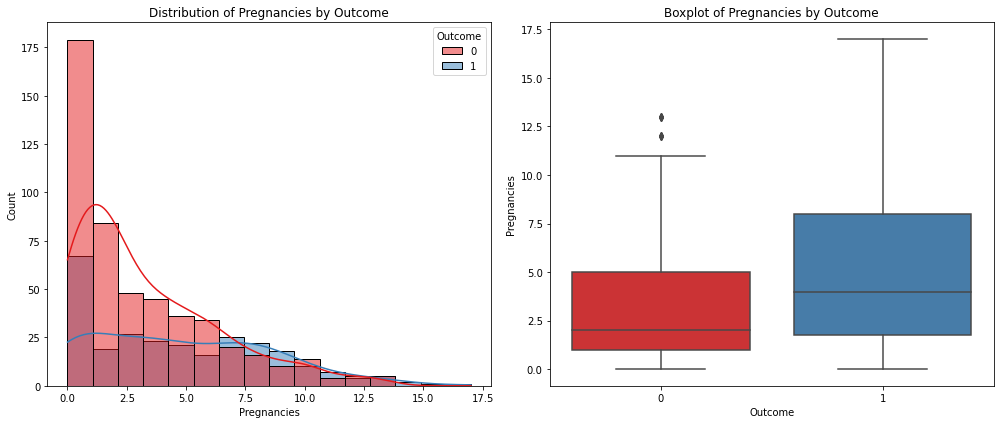

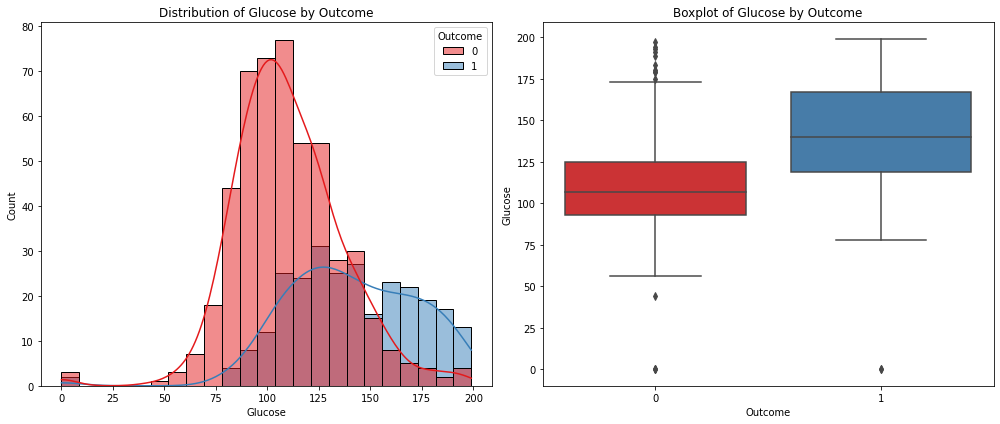

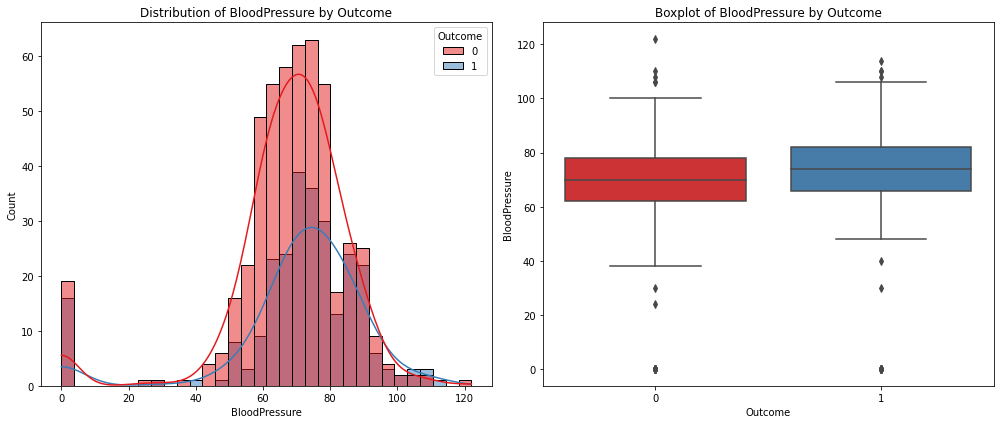

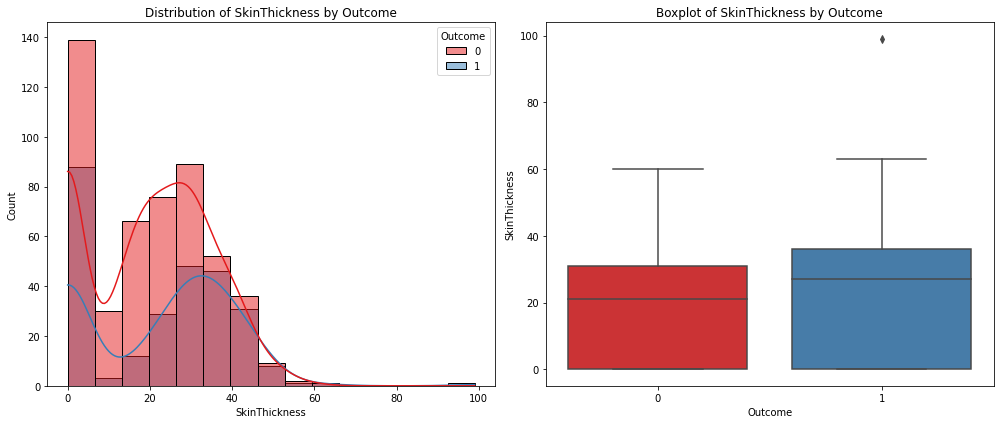

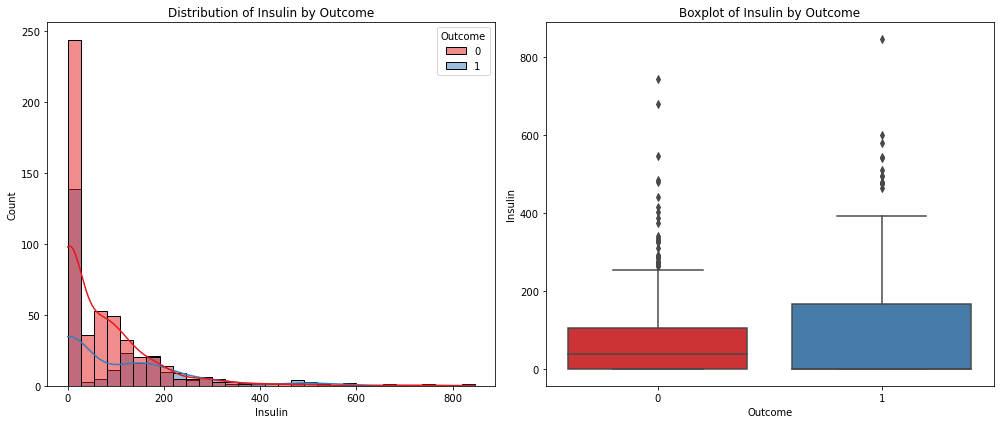

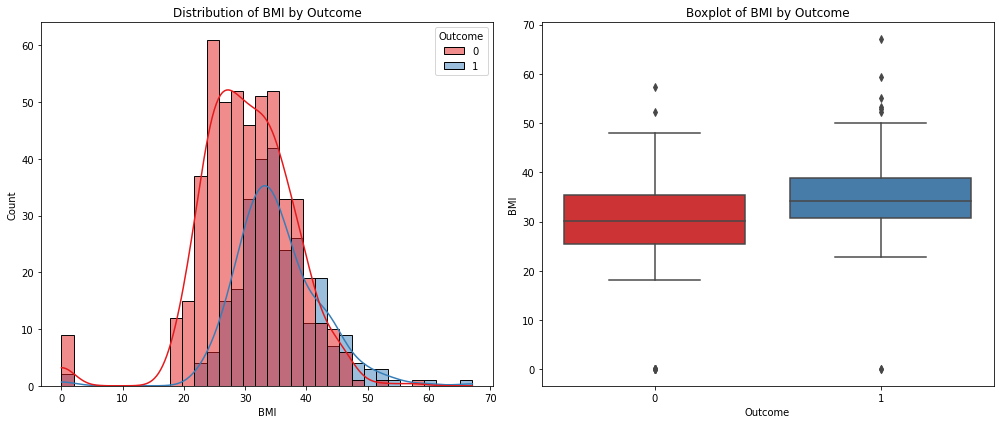

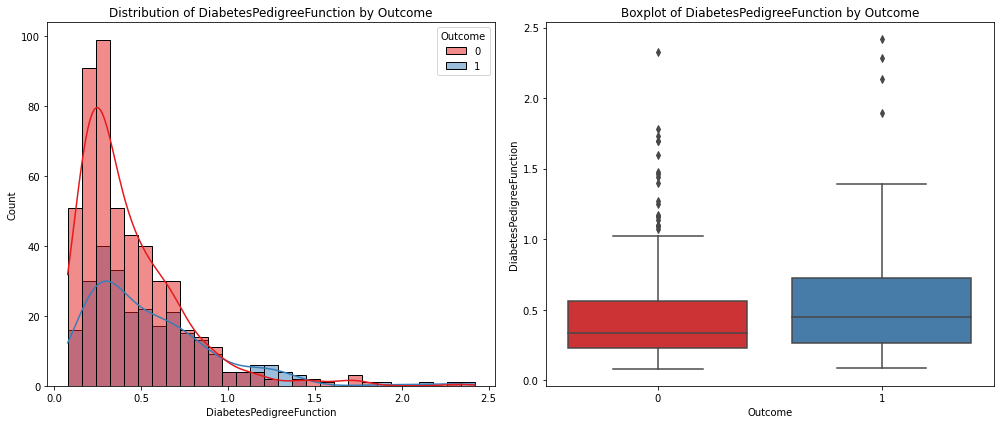

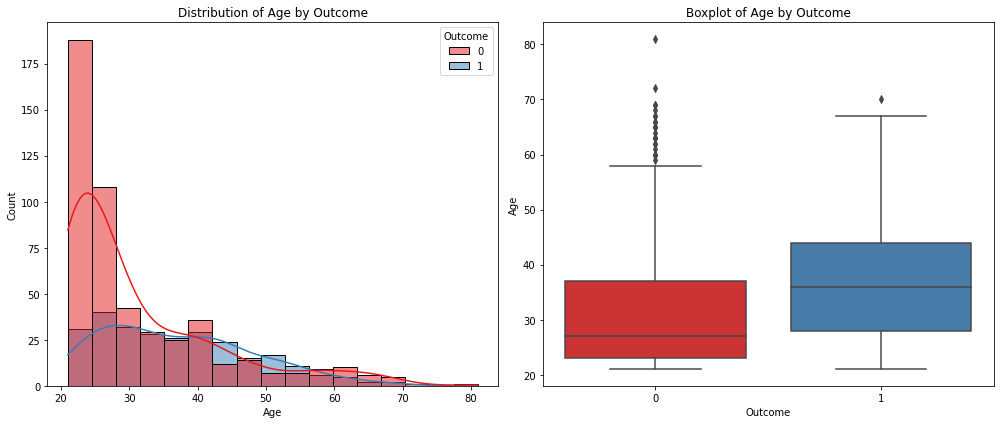

In [5]:
# List of numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot distribution and boxplots for each numerical column
for col in numerical_cols:
    if col != 'Outcome':  # Exclude the target variable itself
        plt.figure(figsize=(14, 6))

        # Distribution Plot
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=col, hue='Outcome', kde=True, palette='Set1')
        plt.title(f'Distribution of {col} by Outcome')

        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(x='Outcome', y=col, data=df, palette='Set1')
        plt.title(f'Boxplot of {col} by Outcome')

        # Show the plots
        plt.tight_layout()
        plt.show()

- There outliers -> standard scaler

## ML

In [6]:
!pip install xgboost catboost



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   --------------------------------------- 124.9/124.9 MB 18.7 MB/s eta 0:00:00
   --------------------------------------- 101.8/101.8 MB 16.4 MB/s eta 0:00:00
   ---------------------------------------- 47.1/47.1 kB 2.5 MB/s eta 0:00:00


Model: KNN
Accuracy: 0.7013
F1 Score: 0.5548
Confusion Matrix:
[[119  32]
 [ 37  43]]


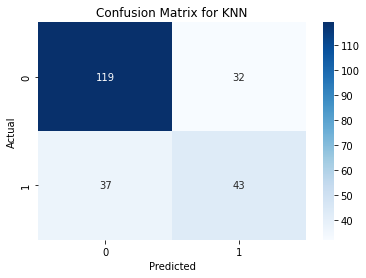

Model: Logistic Regression
Accuracy: 0.7359
F1 Score: 0.6211
Confusion Matrix:
[[120  31]
 [ 30  50]]


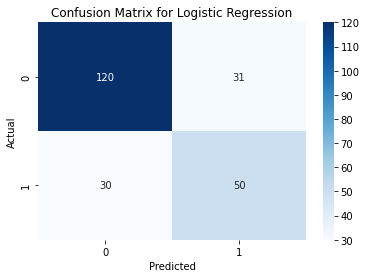

Model: Decision Tree
Accuracy: 0.7056
F1 Score: 0.6136
Confusion Matrix:
[[109  42]
 [ 26  54]]


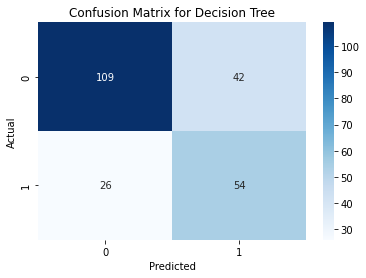

Model: Naive Bayes
Accuracy: 0.7446
F1 Score: 0.6424
Confusion Matrix:
[[119  32]
 [ 27  53]]


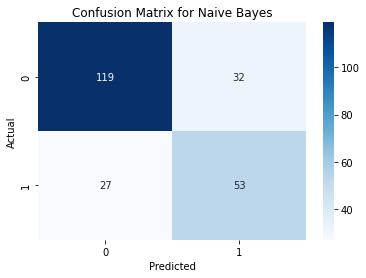

Model: SVM (Linear)
Accuracy: 0.7489
F1 Score: 0.6329
Confusion Matrix:
[[123  28]
 [ 30  50]]


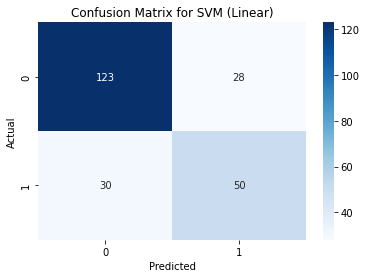

Model: SVM (RBF)
Accuracy: 0.7446
F1 Score: 0.6144
Confusion Matrix:
[[125  26]
 [ 33  47]]


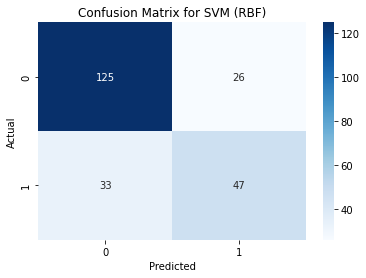

Model: SVM (Polynomial)
Accuracy: 0.7489
F1 Score: 0.5672
Confusion Matrix:
[[135  16]
 [ 42  38]]


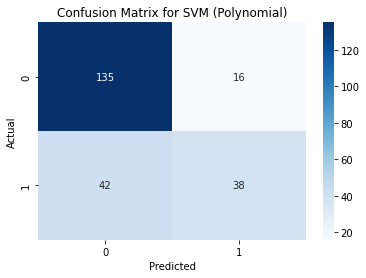

Model: Gaussian Process
Accuracy: 0.7100
F1 Score: 0.5677
Confusion Matrix:
[[120  31]
 [ 36  44]]


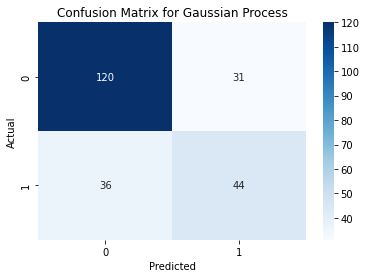

Model: Random Forest
Accuracy: 0.7489
F1 Score: 0.6375
Confusion Matrix:
[[122  29]
 [ 29  51]]


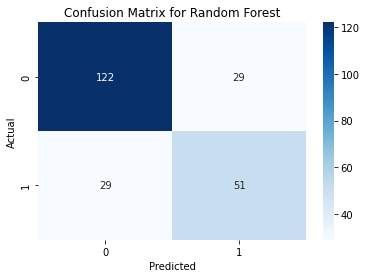

c:\Users\Motasem-PC\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [09:54:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Accuracy: 0.7273
F1 Score: 0.6228
Confusion Matrix:
[[116  35]
 [ 28  52]]


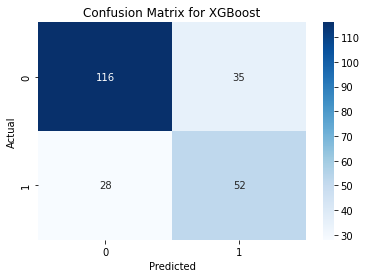

Model: CatBoost
Accuracy: 0.7403
F1 Score: 0.6296
Confusion Matrix:
[[120  31]
 [ 29  51]]


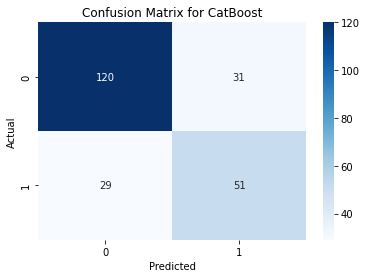

Model: AdaBoost
Accuracy: 0.7403
F1 Score: 0.6250
Confusion Matrix:
[[121  30]
 [ 30  50]]


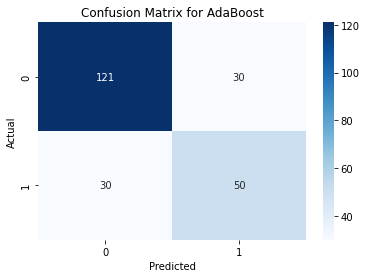

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data - assume your DataFrame is 'df'
# Features and target split
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']               # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply standard scaling to the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of models to test
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM (Linear)": SVC(kernel='linear'),
    "SVM (RBF)": SVC(kernel='rbf'),
    "SVM (Polynomial)": SVC(kernel='poly'),
    "Gaussian Process": GaussianProcessClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0),
    "AdaBoost": AdaBoostClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # Plot Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print("="*60)


In [8]:
# Tune

from sklearn.model_selection import GridSearchCV

# Define the parameter grids for each model

# SVM (Linear)
svm_linear_params = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [1000, 2000, 3000],
}

# Naive Bayes (GaussianNB doesn't have many tunable hyperparameters)
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# XGBoost
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Initialize models
models = {
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Parameter grids
param_grids = {
    'SVM (Linear)': svm_linear_params,
    'Naive Bayes': nb_params,
    'Random Forest': rf_params,
    'XGBoost': xgb_params
}


# Perform grid search for each model
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")

    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], scoring='f1', cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    # Get the best parameters and the default parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for {name}: {best_params}")

    # Display the default parameters used (before tuning)
    print(f"Default parameters for {name}: {model.get_params()}")

    # Test the best model on the test set
    y_pred = best_model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Model: {name} (Best)")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("="*60)


Tuning hyperparameters for SVM (Linear)...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\Motasem-PC\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best parameters for SVM (Linear): {'C': 1, 'max_iter': 3000}
Default parameters for SVM (Linear): {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Model: SVM (Linear) (Best)
Accuracy: 0.7489
F1 Score: 0.6329
Confusion Matrix:
[[123  28]
 [ 30  50]]
Tuning hyperparameters for Naive Bayes...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for Naive Bayes: {'var_smoothing': 1e-09}
Default parameters for Naive Bayes: {'priors': None, 'var_smoothing': 1e-09}
Model: Naive Bayes (Best)
Accuracy: 0.7446
F1 Score: 0.6424
Confusion Matrix:
[[119  32]
 [ 27  53]]
Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split':

c:\Users\Motasem-PC\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [09:55:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


c:\Users\Motasem-PC\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [09:55:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: Random Forest (Best)
Accuracy: 0.7576
F1 Score: 0.6500
Confusion Matrix:
[[123  28]
 [ 28  52]]
Model: XGBoost (Best)
Accuracy: 0.7359
F1 Score: 0.6347
Confusion Matrix:
[[117  34]
 [ 27  53]]
Feature Importance for Random Forest:


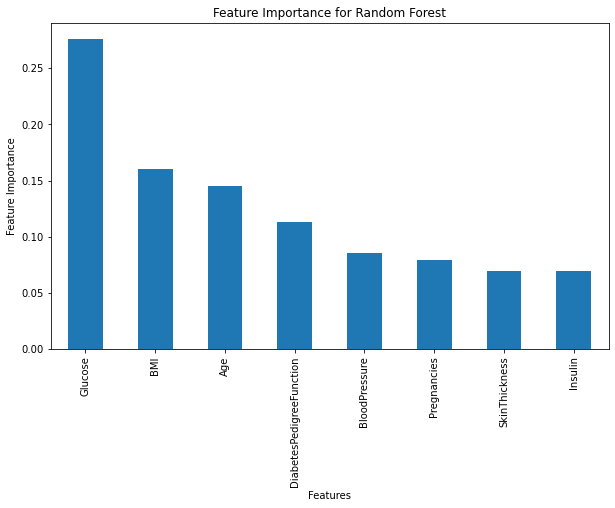

Feature Importance for XGBoost:


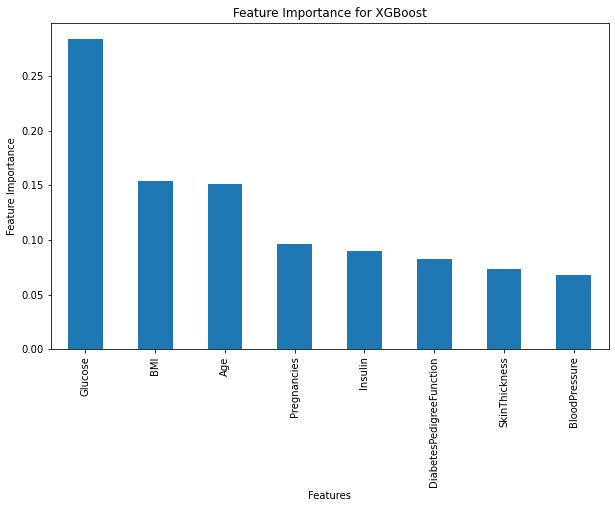

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'X_train_scaled', 'X_test_scaled', 'y_train', 'y_test' are already defined

# Retrieve the best-tuned models from the GridSearchCV results

# Best-tuned Random Forest model
rf_best_params = {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2}
rf_best_model = RandomForestClassifier(**rf_best_params, random_state=42)
rf_best_model.fit(X_train_scaled, y_train)

# Best-tuned XGBoost model
xgb_best_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
xgb_best_model = XGBClassifier(**xgb_best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_best_model.fit(X_train_scaled, y_train)

# Evaluate the models
for name, model in zip(['Random Forest', 'XGBoost'], [rf_best_model, xgb_best_model]):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Model: {name} (Best)")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("="*60)

# Function to plot feature importance for tree-based models (Random Forest, XGBoost)
def plot_feature_importance_tree_based(model, features, title):
    importance = model.feature_importances_  # Extract feature importance
    feature_importance = pd.Series(importance, index=features).sort_values(ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar', title=title)
    plt.ylabel('Feature Importance')
    plt.xlabel('Features')
    plt.show()

# Assuming 'X' contains the feature names
features = X.columns

# Plot feature importance for Random Forest
print("Feature Importance for Random Forest:")
plot_feature_importance_tree_based(rf_best_model, features, "Feature Importance for Random Forest")

# Plot feature importance for XGBoost
print("Feature Importance for XGBoost:")
plot_feature_importance_tree_based(xgb_best_model, features, "Feature Importance for XGBoost")


In [10]:
# Ensamble

from sklearn.ensemble import VotingClassifier

# Assuming 'X_train_scaled', 'X_test_scaled', 'y_train', 'y_test' are already defined

# Best parameters from GridSearchCV (retrieved from previous steps)
# For simplicity, we will use the tuned models
svm_best_params = {'C': 1, 'max_iter': 3000}
rf_best_params = {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2}
xgb_best_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
nb_best_params = {'var_smoothing': 1e-09}

# Initialize models with their best parameters
svm_model = SVC(**svm_best_params, kernel='linear', random_state=42, probability=True)
rf_model = RandomForestClassifier(**rf_best_params, random_state=42)
xgb_model = XGBClassifier(**xgb_best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
nb_model = GaussianNB(**nb_best_params)

# Train the individual models
svm_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)
nb_model.fit(X_train_scaled, y_train)

# Set weights based on previous performance:
# - SVM (Linear): Accuracy: 0.7489, F1: 0.6329
# - Naive Bayes: Accuracy: 0.7446, F1: 0.6424
# - Random Forest: Accuracy: 0.7576, F1: 0.6500
# - XGBoost: Accuracy: 0.7359, F1: 0.6347

# Assign weights based on F1 score or Accuracy (higher performance gets higher weight)
weights = [0.63, 0.64, 0.65, 0.63]  # Example weights proportional to F1 score

# Create the Voting Classifier with weighted voting
ensemble_model = VotingClassifier(
    estimators=[
        ('svm', svm_model),
        ('nb', nb_model),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    voting='soft',  # Use soft voting to use the predicted probabilities for the final prediction
    weights=weights  # Assign weights to each model
)

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Make predictions using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Output the evaluation results
print("Ensemble Model Performance:")
print(f"Accuracy: {accuracy_ensemble:.4f}")
print(f"F1 Score: {f1_ensemble:.4f}")
print("Confusion Matrix:")
print(cm_ensemble)


c:\Users\Motasem-PC\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Motasem-PC\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [09:55:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Motasem-PC\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Ensemble Model Performance:
Accuracy: 0.7273
F1 Score: 0.6087
Confusion Matrix:
[[119  32]
 [ 31  49]]


c:\Users\Motasem-PC\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [09:55:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [11]:
# save scaler and model!
import joblib

# Save the scaler
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)

# Save the ensemble model
ensemble_model_filename = 'ensemble_model.pkl'
joblib.dump(ensemble_model, ensemble_model_filename)

print(f"Scaler saved as {scaler_filename}")
print(f"Ensemble model saved as {ensemble_model_filename}")
 

Scaler saved as scaler.pkl
Ensemble model saved as ensemble_model.pkl


In [12]:
print(df.columns)
print("-"*50)
print(df.describe())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
--------------------------------------------------
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                